In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import feature_selection

In [176]:
df = pd.read_csv('final project 2.csv')
df.columns = ['SID', 'Site','CID','Campaign','Size','Device','Impressions','Rate','Time','Touch']
df.head()

,SID,Site,CID,Campaign,Size,Device,Impressions,Rate,Time,Touch
0,172365904,sbn,222458344,SB Nations - Net Communities Luma tag,300x250,iPhone,51291646,0.33,10.62,0.19
1,172365904,sbn,222458344,SB Nations - Net Communities Luma tag,300x250,Android Phone,41187658,0.32,11.58,0.09
2,172365904,sbn,432771664,50001622_Product Q2-Q3,300x265,iPhone,21026492,0.66,10.89,0.48
3,172365784,verge,220395784,TheVerge - Net Communities Luma tag,300x250,Android Phone,20392741,0.27,11.35,0.08
4,172365904,sbn,438358864,50002179_Ticket Partnership Year 1,300x265,iPhone,20219612,0.69,11.23,0.55


Since there are more variables than needed, I extracted only the ones I'll be using and plotted them against their frequency to get an idea of the distrubution.

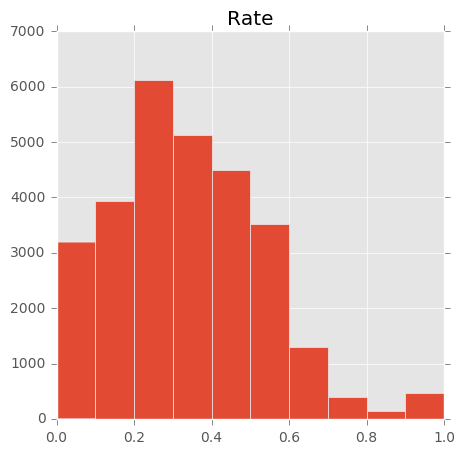

In [223]:
columns_to_keep = ["Site", "Size", "Device", "Rate"] #took out time b/c it is "historical" data and won't help much in prediction. 
df_column = df[columns_to_keep]
fig, ax = plt.subplots(figsize=(5,5))
df_column.hist(ax=ax);

In [224]:
df_column.describe()

,Rate
count,28687.000000
mean,0.334479
std,0.199889
min,0.000000
25%,0.200000
50%,0.320000
75%,0.460000
max,1.000000


In [179]:
# convert sites into dummies
size = pd.get_dummies(df_column.Size, prefix='size')
size.head()

,size_1030x590,size_300x250,size_300x265,size_320x50
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [180]:
site = pd.get_dummies(df_column.Site, prefix='site')
site.head()

,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,site_racked,site_recode,site_sbn,site_verge,site_vox,site_voxcreative
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [181]:
device = pd.get_dummies(df_column.Device, prefix='device')
device.head()

,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [182]:
df_join = df_column.join(size).drop("Size", axis=1).join(site).drop("Site", axis=1).join(device).drop("Device", axis=1)
df_join.head()

,Rate,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,0.33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.32,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.66,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.27,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.69,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [183]:
df_join.describe()

,Rate,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
count,28687.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,...,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000,28881.000000
mean,0.334479,0.326685,0.417610,0.090752,0.164953,0.000173,0.075136,0.068869,0.029881,0.081230,...,0.003809,0.195042,0.118902,0.063225,0.085350,0.089609,0.038884,0.132544,0.202659,0.073786
std,0.199889,0.469009,0.493174,0.287261,0.371144,0.013157,0.263615,0.253235,0.170263,0.273193,...,0.061598,0.396240,0.323678,0.243371,0.279407,0.285626,0.193321,0.339087,0.401988,0.261426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.460000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
df_join.corr() #try scaling first to see if correlation helps but just might not be linear. 

,Rate,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
Rate,1.000000,-0.087044,0.076345,0.256394,-0.190055,0.001157,-0.012933,0.034732,0.076371,0.007237,...,-0.035815,-0.039845,0.009486,-0.042225,0.032651,-0.054999,0.059325,0.045687,0.015162,-0.010715
size_1030x590,-0.087044,1.000000,-0.589840,-0.220060,-0.309585,-0.009166,-0.044504,-0.024133,0.251960,-0.012000,...,0.080380,-0.011034,0.008933,-0.004710,0.005211,-0.012009,0.019909,0.036022,-0.018933,-0.014732
size_300x250,0.076345,-0.589840,1.000000,-0.267525,-0.376360,-0.000470,0.030838,0.026720,-0.148616,0.019092,...,-0.047800,-0.006804,0.000201,-0.007661,-0.004375,-0.004369,0.003640,0.027412,-0.002493,-0.007769
size_300x265,0.256394,-0.220060,-0.267525,1.000000,-0.140414,0.023328,0.027009,0.017847,-0.055446,0.003131,...,-0.019535,-0.020140,0.003858,0.029860,0.012208,0.026644,-0.008052,-0.026802,-0.021940,0.030251
size_320x50,-0.190055,-0.309585,-0.376360,-0.140414,1.000000,-0.005848,-0.005644,-0.018823,-0.078003,-0.012628,...,-0.022938,0.038572,-0.014541,-0.006978,-0.010220,0.000360,-0.023764,-0.061201,0.044220,0.005526
site_MKBHD,0.001157,-0.009166,-0.000470,0.023328,-0.005848,1.000000,-0.003751,-0.003579,-0.002309,-0.003913,...,-0.000814,0.013449,-0.004834,-0.003419,-0.004020,-0.004128,-0.002647,-0.005144,0.006460,-0.003714
site_curbed,-0.012933,-0.044504,0.030838,0.027009,-0.005644,-0.003751,1.000000,-0.077516,-0.050023,-0.084750,...,-0.017624,0.054948,0.005269,-0.043284,-0.046169,-0.057691,-0.053933,0.041983,0.068366,-0.056833
site_eater,0.034732,-0.024133,0.026720,0.017847,-0.018823,-0.003579,-0.077516,1.000000,-0.047730,-0.080865,...,-0.016816,0.054199,-0.012883,-0.038067,-0.031203,-0.048462,-0.046214,0.017892,0.074462,-0.047993
site_network,0.076371,0.251960,-0.148616,-0.055446,-0.078003,-0.002309,-0.050023,-0.047730,1.000000,-0.052184,...,-0.010852,-0.009403,0.011553,0.005379,0.011895,-0.003085,0.007830,0.013563,-0.014112,-0.016085
site_polygon,0.007237,-0.012000,0.019092,0.003131,-0.012628,-0.003913,-0.084750,-0.080865,-0.052184,1.000000,...,-0.018385,0.062833,-0.004677,-0.063186,-0.041385,-0.017849,-0.055217,-0.007456,0.051255,0.004799


In [185]:
from sklearn.preprocessing import Imputer
#filling in missing values w/ mean and scaling
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_join['Rate'] = imp.fit_transform(df_join[['Rate']])
#imputed_data = imp.transform(df_var)


In [186]:
from sklearn.preprocessing import scale
#scaling, regulating data for mean to equal zero and STD to equal 1
#scaled_data = scale(df_join[['Rate','Time','Touch']])
df_join['Rate'] = scale(df_join[['Rate']])

In [187]:
df_join.head()

,Rate,size_1030x590,size_300x250,size_300x265,size_320x50,site_MKBHD,site_curbed,site_eater,site_network,site_polygon,...,site_voxcreative,device_Android Phone,device_Android Tablet,device_BlackBerry,device_Kindle,device_Windows Phone,device_Windows Tablet,device_iPad,device_iPhone,device_iPod
0,-0.022485,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.072683,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.634037,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.323671,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.784630,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [188]:
#testing mean & std to see if I scaled correctly. Although mean does not equal zero, it becomes very very close.
df_join[['Rate']].mean()

Rate    1.963722e-16
dtype: float64

In [189]:
#testing mean & std to see if I scaled correctly. Although mean does not equal zero, it becomes very very close.
df_join[['Rate']].std()

Rate    1.000017
dtype: float64

In [190]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn import svm

# cross-validation to split the DataFrame into a train set with 80 rows and a test set with 20 rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [191]:
X_train.shape, y_train.shape

((23104, 2), (23104,))

In [192]:
X_test.shape, y_test.shape

((5777, 2), (5777,))

In [210]:
# Fit:
from sklearn import linear_model, metrics
## Train the model using the training sets
lm = linear_model.LinearRegression().fit(X_train, y_train)
metrics.mean_squared_error(y_train, lm.predict(X_train))

0.76852046060141421

NOTE TO SELF: 
GridSearchCV  be used to find the optimal parameters to train my final model. Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. You should then take these parameters and train your final model on all of the data. It is important to note that if you have trained your final model on all of your data, you cannot test it. For any correct test, you must must reserve some of the data.

In [213]:
#gridsearch cv to test out parameters
from sklearn.grid_search import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lm,parameters, cv=5)
grid.fit(X_train, y_train)
print "r2 / variance : ", grid.best_score_
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.229002816449
Residual sum of squares: 0.77


In [222]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'OLS R2:', lm.score(X_train, y_train)

#
lm_lasso = linear_model.Lasso(alpha = .5).fit(X_train, y_train)

print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_train, lm_lasso.predict(X_train))
print 'Lasso R2:', lm_lasso.score(X_train, y_train)
print 'Lasso Coef:', lm_lasso.coef_

#shrinks coefficients oropotion to correlation
lm_ridge = linear_model.Ridge(alpha = .5).fit(X_train, y_train)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_train, lm_ridge.predict(X_train))
print 'Ridge R2:', lm_ridge.score(X_train, y_train)
print 'Ridge Coef:', lm_ridge.coef_

~~~ OLS ~~~
OLS MSE:  0.768520460601
OLS R2: 0.228990756917
~~~ Lasso ~~~
Lasso MSE:  0.996772045856
Lasso R2: 0.0
Lasso Coef: [ 0.  0.]
~~~ Ridge ~~~
Ridge MSE:  0.768520460723
Ridge R2: 0.228990756795
Ridge Coef: [ 0.2042299   0.44906616]


In [225]:
# from sklearn import svm
# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)                           

In [206]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))

('Coefficients: \n', array([ 0.20423518,  0.44907631]))
Mean squared error: 0.77
Variance score: 0.24


Try Random Forest Regressor as a way to customize parameter setting. 